# Install Packages

!pip install -r requirement.txt

# Importing Required Libraries

In [71]:
import pandas as pd

# Reading and Exploring the Data

In [72]:
df = pd.read_csv('Ecomsales_data.csv')

In [73]:
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [75]:
df.columns

Index(['Customer ID', 'Purchase Date', 'Product Category', 'Product Price',
       'Quantity', 'Total Purchase Amount', 'Payment Method', 'Customer Age',
       'Returns', 'Customer Name', 'Age', 'Gender', 'Churn'],
      dtype='object')

In [76]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
df['Date'] = df['Purchase Date'].dt.date
df['Month'] = df['Purchase Date'].dt.month
df['Year'] = df['Purchase Date'].dt.year

# Using the Pandas AI

In [77]:
#Instantiate LLM (I'm using OpenAI model, one can use other LLM like Falcon 40B,XGen,MPT-30B,GooglePalm,Starcode etc). Note replaceyour api key with your original API key. This is remove for security reasons.
from pandasai import SmartDataframe
from pandasai.llm.openai import OpenAI
llm = OpenAI(api_token="YOUR API KEY")
df = SmartDataframe(df, config={"llm": llm})

# Payment Analysis:

In [78]:
#Average Purchase Amount by Payment Method ?
df.chat('Average Purchase Amount by Payment Method')

,Payment Method,Average Purchase Amount
0,Cash,2715.557437
1,Credit Card,2738.852562
2,PayPal,2721.677952


In [81]:
#Distribution of Payment Methods Used by Customers ?
df.chat('Distribution of Payment Methods Used by Customers')

,Payment Method
Credit Card,33.4188
PayPal,33.3764
Cash,33.2048


# Purchase Behavior Analysis

In [83]:
#Average quantity of products purchased in a single transaction ?
df.chat('Average quantity of products purchased in a single transaction')

3.004936

In [85]:
#Most popular product categories and their average prices ?
df.chat('Most popular product categories and their average prices')

,Count,Average Price
Electronics,62630,254.283921
Clothing,62581,254.324875
Home,62542,255.641249
Books,62247,254.721657


In [87]:
#Average price of Product Category ?
df.chat('Average price of Product Category')

,Product Price
Product Category,
Books,254.72
Clothing,254.32
Electronics,254.28
Home,255.64


# Return Behavior Analysis:

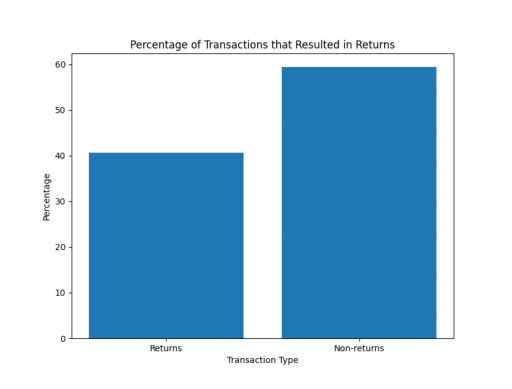

In [88]:
#Percentage of transactions that resulted in returns. Graphical representation ?
df.chat('Percentage of transactions that resulted in returns. Graphical representation')

In [90]:
df.chat('Percentage of transactions that resulted in returns')

40.59

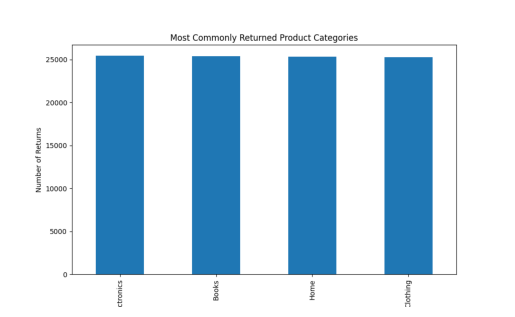

In [99]:
#Most commonly returned product categories
df.chat('Most commonly returned product categories. Result as Bar chart ')

In [97]:
#returns by age group
df.chat('returns by age group. bin the age in range of 10')

,Age Group,Returns Count
0,0-9,0
1,10-19,5932
2,20-29,19757
3,30-39,18930
4,40-49,19045
5,50-59,18688
6,60-69,19124
7,70-79,0
8,80-89,0
9,90-99,0


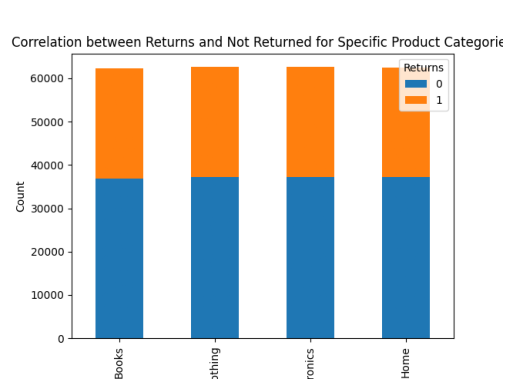

In [104]:
#Correlation between returns and specific product categories
df.chat('Correlation between returns and not returned for specific product categories. Result as bar chart')

# Loyal and Retention Analysis:

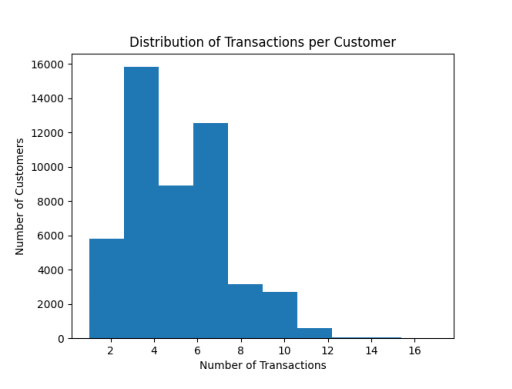

In [107]:
#Average number of transactions per customer ?
df.chat('Average number of transactions per customer. Present as distribution chart')

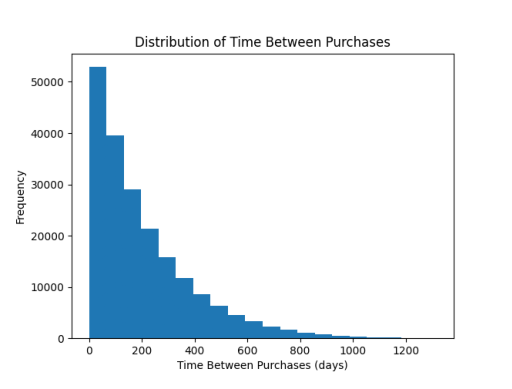

In [109]:
#Average time between consecutive purchases for a customer ?
df.chat('Average time between consecutive purchases for a customer. Present as distribution chart')